<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [52]:
#Читаем файл с диска и выводим число записей
data_hh = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')
display(data_hh.shape)
display(data_hh.info())

(44744, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [53]:
#Выводим первые две записи
display(data_hh.head(2))

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [54]:
#Выводим инфу о столбцах ии смотрим количество непустых значений
display(data_hh.info())
#display(data_hh.isnull())

#Определяем число уникальных значений в столбце Опыт работы
#display(data_hh['Опыт работы'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.


In [55]:
#Выводим статистическую информацию о столбцах
display(data_hh.describe())


Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [56]:
#Создаем функцию пробразующую образование
def edu(obraz):
    obraz=' '.join(obraz.split(' ')[:3])
    if 'Высшее' in obraz:
        return 'высшее'
    elif 'Неоконченное высшее' in obraz:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in obraz:
        return 'среднее специальное'
    elif 'Среднее образование' in obraz:
        return 'среднее'

#Создаем новый признак в датасете и заносим в него инфу с помощью функции
data_hh['Образование']=data_hh['Образование и ВУЗ'].apply(edu)

#Удаляем признак, который преобразовывали
data_hh = data_hh.drop('Образование и ВУЗ', axis=1)

display(data_hh['Образование'].value_counts())





высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [57]:
#Создаем функцию выделяющую Пол
def create_sex(pol):
    if 'М' in pol:
        return 'М'
    return 'Ж'

#Создаем функцию, выделяющую возраст
def create_age(vozr):
    vozr=int(vozr.split(',')[1][2:4])
    return vozr

#Создаем и заполняем новые признаки в датасете, удаляем старый признак
data_hh['Пол']=data_hh['Пол, возраст'].apply(create_sex)
data_hh['Возраст']=data_hh['Пол, возраст'].apply(create_age)
data_hh=data_hh.drop('Пол, возраст', axis=1)

#display(data_hh['Пол'].value_counts())
#display(data_hh['Возраст'].mean())
#display(data_hh.head(5))  


    

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [58]:
#Обрабатываем признак опыт работы
#Создаем функцию
def create_exper(opyt):
    if opyt is np.nan or opyt=='Не указано' or opyt=='':
        return np.nan
    opyt=opyt.split(' ')[:6]
    year_dict=['год', 'года', 'лет']
    month_dict=['месяц', 'месяца', 'месяцев']
    years=0
    months=0
    for index,item in enumerate(opyt):
        if item in year_dict:
            years=int(opyt[index-1])
        if item in month_dict:
            months=int(opyt[index-1])
    return int(years*12+months)

#Проверка работоспособности функции
#display(create_exper('Опыт работы 4 года 5 месяцев'))
#display(create_exper(np.nan))    
#display(create_exper(''))        

#Создаем новый признак в сете и удаляем старый признак
data_hh['Опыт работы (месяц)']=data_hh['Опыт работы'].apply(create_exper)
data_hh=data_hh.drop('Опыт работы', axis=1)
#display(data_hh['Опыт работы (месяц)'].median())
#display(data_hh.head(10))


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [59]:
#Создаем и обрабатываем новые признаки -  город, готовность к переезду, готовность к коммандировкам
#функция обработки города
def determine_city(city_str):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    city_str=city_str.split(' , ')[0]
    if city_str=='Москва' or city_str=='Санкт-Петербург':
        return city_str
    elif city_str in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'      

#display(determine_city('Москва, не готов'))

#Обрабатываем переезд
def determine_reloc(reloc_str):
    if ('не готов к переезду' in reloc_str) or ('не готова к переезду' in reloc_str):
        return False
    elif 'хочу' in reloc_str:
        return True
    else:
        return True
    
#Обрабатываем командировки
def determine_btrip(btrip_str):
    if 'командировк' in btrip_str:
        if ('не готова к командир' in btrip_str) or ('не готов к командир' in btrip_str):
            return False
        else:
            return True
    return False
data_hh['Город'] = data_hh['Город, переезд, командировки'].apply(determine_city)
data_hh['Готовность к переезду'] = data_hh['Город, переезд, командировки'].apply(determine_reloc)
data_hh['Готовность к командировкам'] = data_hh['Город, переезд, командировки'].apply(determine_btrip)

#display(data_hh['Город'].value_counts())
#display(data_hh[data_hh['Готовность к переезду'] & data_hh['Готовность к командировкам']].shape[0] / data_hh.shape[0] *100)
data_hh = data_hh.drop('Город, переезд, командировки', axis=1)



    

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [60]:
#Преобразуем признак занятость и график
#Создаем списки вариантов признаков
job_emp=['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
job_chart=['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for emp, chart in zip(job_emp, job_chart):
    data_hh[emp]=data_hh['Занятость'].apply(lambda x: emp in x)
    data_hh[chart]=data_hh['График'].apply(lambda x: chart in x)
data_hh=data_hh.drop('Занятость', axis=1)
data_hh=data_hh.drop('График', axis=1)
display(data_hh[data_hh['проектная работа'] & data_hh['волонтерство']].shape[0])
display(data_hh[data_hh['вахтовый метод'] & data_hh['гибкий график']].shape[0])
#display(data_hh.head(10))

436

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [61]:
#Модифицируем признак ЗП
#Открываем файл с курсами на даты, проводим преолбрпазование к одному формату дат в обоих датасетах
erates = pd.read_csv('data\ExchangeRates.csv')
erates['date'] = pd.to_datetime(erates['date']).dt.date
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме']).dt.date

#готовим функции выдеелняи цифровой части ЗП и валюты ЗП
def salary_fl(salary):
    salary=float(salary.split(' ')[0])
    return salary

def salary_curr(curr):
    curr=curr.split(' ')[1].replace('.', '')
    currency_dict={
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    if curr=='руб':
        return 'RUB'
    else:
        return currency_dict[curr]

#Вносим в датасет новые признаки - цифровоую часть ЗП и валюту ЗП
data_hh['ЗП_число']=data_hh['ЗП'].apply(salary_fl)
data_hh['Валюта']=data_hh['ЗП'].apply(salary_curr)

#Объединяем два датасета - данные ХХ и курс валют по датам
data_hh_tmp = data_hh.merge(
    erates, 
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)

#Подготавливаем признаки и переводимвсю ЗП в рубли в новый признак
data_hh_tmp['close']=data_hh_tmp['close'].fillna(1)
data_hh_tmp['proportion']=data_hh_tmp['proportion'].fillna(1)
data_hh['ЗП (руб)']=data_hh_tmp['close'] * data_hh_tmp['ЗП_число'] / data_hh_tmp['proportion']
data_hh=data_hh.drop(['ЗП', 'ЗП_число', 'Валюта'], axis=1)

display(data_hh['ЗП (руб)'].median())

data_hh.to_csv('data\data_hh_obrab.csv', index=False)

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [72]:
# ваш код здесь
display(data_hh['Возраст'].mode())
fig=px.histogram(
    data_frame=data_hh,
    x='Возраст',
    title='Распределение возраста',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()

0    30
Name: Возраст, dtype: int64

Мода распределения равна 30. Возраст сосискателей в диапазоне 10-77лет. Возраст большинства соискателей находится в диапазоне 18-60лет. Есть аномалии  - например возраст 10 лет и 77 лет. Маловероятно, что люди возраста 10 лет и 77 лет искали работу на HH.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [78]:
display(data_hh['Опыт работы (месяц)'].mode())
fig=px.histogram(
    data_frame=data_hh,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()

0    81.0
Name: Опыт работы (месяц), dtype: float64

Мода распределния опыта равна 81 мес. Есть аномалии - 1188мес,664мес, это 99 и 55 лет соответственно, этих сосискателей необходимо отдельно проверить. Все значения в диапазоне 1-1188. Большая часть в диапазоне 1-586 мес.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [83]:
fig=px.histogram(
    data_frame=data_hh,
    x='ЗП (руб)',
    title='Распределение з/п',
    histnorm='percent',
    width=5000,
    marginal='box'
)
fig.show()

Пределеьное значение признака в диапазоне "-2500р"   - 24,3млн. Большинство соискателей хотят ЗП в диапазоне 17,5тр - 300тр. Аномалии цифры выше 1 млн нуждаются в проверке (очевидно, что ожидание ЗП 25млн не серьезно указано кандидатом), а также ЗП с отрицательным значение.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [85]:
# График взаимосвязи образования и ожидаемой ЗП
bar_data=data_hh[data_hh['ЗП (руб)']<1000000].groupby('Образование', as_index=False).median()
fig=px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная желаемая з/п от уровня образования'
)
fig.show()

подтверждается, что соискатели с высшим образованием хотят большую ЗП и дороже стоят на рынке. Признак образования важен для прогнозирования уровня ЗП. Интересно отметить то, что кандидаты с средним образованием (школа) ожидают более высокий уровень ЗП, чем кандидаты закончившие среднее специальное образование (нижние медианные значения ЗП).

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [89]:
# График взаимосвязи ожидаемой ЗП и города проживания кандидата
box_data = data_hh[data_hh['ЗП (руб)']<1000000]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение ЗП по городам'
)
fig.show()

Интересно отметить, что медианные уровни в городах миллионниках и прочих городах имеют одинаковый уровень. Медианные уровни ЗП Москвы и Питера значимо больше, по Москве 85к, Питер 60к. Но интересно отметить,что граница третьего квартала у Москвы существенно выше относительно медианы, чем у Питера. Признак город важен для прогнозирования уровня ЗП.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [90]:
# Диаграмма взаимосвязи  медианной ЗП и готовность к переезду и команидировкам
bar_data=data_hh.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig=px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная ЗП в отношении готовности к командировкам и переезду'
)
fig.show()

In [68]:
#ваши выводы здесь
#Ujnj

SyntaxError: invalid syntax (1506124366.py, line 1)

Выводы  - готовность к командировкам и переездам позволяет кандидатам иметь большие ЗПные ожидания. Готовность к командировкам более сильно влияет на ожидания по ЗП, чем готовноть к переезду. Максимальные ожидания по ЗП у кандидатов готовы и к переезду и к команидровкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [92]:
#Тепловая карта взаимосвязи уровня ЗП, образования и возраста.
pivot=data_hh.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig=px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='greens',
    title='Медианная ЗП по отношению к образованию и возрасту'
)
fig.show()

Менее всго возраст влияет на уровень ЗПу кандидатов со средним специальным образованием. На тепловой карте видно много выбросов/аномалий, особенно у кандидатов с высшим и средним образованием. Например, 16 лет, высшее образование (чего не может быть в 16 лет),доход 122к. Или у средне специального образования -  возраст 10 лет, уровень ЗП  - 60. Наибольший уровень ЗП ожидают кандидаты возраста 40-45 лет с высшим или не полным высшим образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

(7, 24)


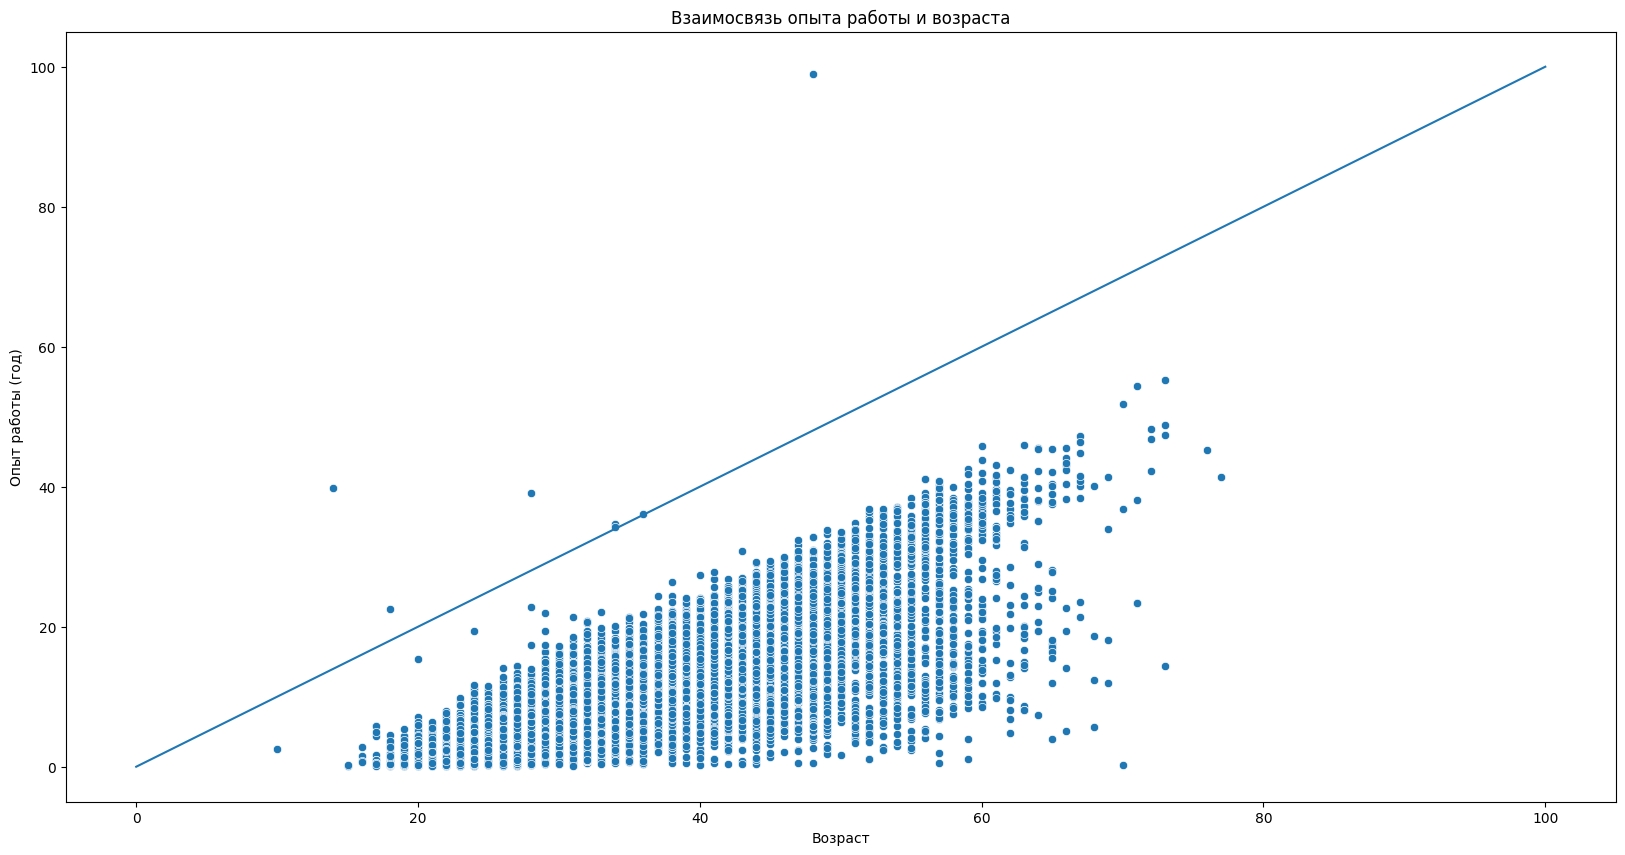

In [93]:
# Диаграмма связи возраста и опыта работы
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(20, 10))
scatter_data=data_hh.copy()
scatter_data['Опыт работы (год)']=scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax=sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Взаимосвязь опыта работы и возраста');
display(scatter_data[scatter_data['Опыт работы (год)']>= scatter_data['Возраст']].shape)

Вполне очевидная взаимосвязь возраста и опыта работы. Есть аномальные значения в  данных, например когда опыт работы превышает или равен возрасту. Таких 7 значений.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь